# Predicting Car Prices

## 1. Analysing the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.neighbors import KNeighborsRegressor


In [2]:
names_of_columns = ["symboling","normalized_losses","make","fuel_type","aspiration","num_doors","body_style","drive_wheels","engine_location","wheel_base","length","width","height","curb_weight","engine_type","num_cylinders","engine_size","fuel_system","bore","stroke","compression_ratio","horsepower","peak_rpm","city_mpg","highway_mpg","price"]

In [3]:
cars = pd.read_csv("imports-85.data",header=None,names=names_of_columns,index_col=False)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
cars.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


### Column description:

- symboling:                -3, -2, -1, 0, 1, 2, 3.
- normalized-losses:        continuous from 65 to 256.
- make:                     alfa-romero, audi, bmw, chevrolet,  dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury,mitsubishi, nissan, peugot, plymouth, porsche,renault,saab, subaru, toyota, volkswagen, volvo


                               
- fuel-type:                diesel, gas.
- aspiration:               std, turbo.
- num-of-doors:             four, two.
- body-style:               hardtop, wagon, sedan, hatchback, convertible.
- drive-wheels:             4wd, fwd, rwd.
- engine-location:          front, rear.
- wheel-base:               continuous from 86.6 120.9.
- length:                   continuous from 141.1 to 208.1.
- width:                    continuous from 60.3 to 72.3.
- height:                   continuous from 47.8 to 59.8.
- curb-weight:              continuous from 1488 to 4066.
- engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
- num-of-cylinders:         eight, five, four, six, three, twelve, two.
- engine-size:              continuous from 61 to 326.
- fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
- bore:                     continuous from 2.54 to 3.94.
- stroke:                   continuous from 2.07 to 4.17.
- compression-ratio:        continuous from 7 to 23.
- horsepower:               continuous from 48 to 288.
- peak-rpm:                 continuous from 4150 to 6600.
- city-mpg:                 continuous from 13 to 49.
- highway-mpg:              continuous from 16 to 54.
- price:                    continuous from 5118 to 45400.

### Numerical columns:


<font color='red'>
- num-of-doors:             four, two.  (numerical text)


<font color='black'> 
- wheel-base:               continuous from 86.6 120.9.
- length:                   continuous from 141.1 to 208.1.
- width:                    continuous from 60.3 to 72.3.
- height:                   continuous from 47.8 to 59.8.
- curb-weight:              continuous from 1488 to 4066.


<font color='red'>
- num-of-cylinders:         eight, five, four, six, three, twelve, two. (numerical text)


<font color='black'>
- engine-size:              continuous from 61 to 326.
- bore:                     continuous from 2.54 to 3.94.
- stroke:                   continuous from 2.07 to 4.17.
- compression-ratio:        continuous from 7 to 23.
- horsepower:               continuous from 48 to 288.
- peak-rpm:                 continuous from 4150 to 6600.
- city-mpg:                 continuous from 13 to 49.
- highway-mpg:              continuous from 16 to 54.
- price:                    continuous from 5118 to 45400.

In [177]:
print(cars.shape)
cars.info()

(205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           2

## 2. Cleaning the data set

In [178]:
for column in cars.columns:
    if type(cars[column][0]) == str:
        cars[column] = cars[column].str.replace("?","np.nan")   
        cars.loc[cars[column]=="np.nan",column]=np.nan
        
numbers = ["0","1","2","3","4","5","6","7","8","9","12"]
text_numbers = ["zero","one","two","three","four",\
                "five","six","seven","eight","nine","twelve"]

for i,v in enumerate(numbers):
    cars["num_cylinders"] = cars["num_cylinders"].\
    str.replace(text_numbers[i],v)
    cars["num_doors"] = cars["num_doors"].\
    str.replace(text_numbers[i],v)

cars["make"] = cars["make"].str.replace("alfa-romero","alfa-romeo")

In [179]:
cars[["curb_weight","engine_size","bore","stroke","compression_ratio",\
      "horsepower","peak_rpm","city_mpg","highway_mpg","price","num_doors","num_cylinders"]] = cars[["curb_weight","engine_size","bore","stroke","compression_ratio",\
      "horsepower","peak_rpm","city_mpg","highway_mpg","price","num_doors","num_cylinders"]].astype(float,copy=False)
     

In [180]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null float64
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null float64
engine_type          205 non-null object
num_cylinders        205 non-null float64
engine_size          205 non-null float64
fuel_system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203

#### Now the potential numerical columns become Numerical float64

##### The following list contains all the columns that can be used as a numerical feature to train the model:

["engine_size","bore","stroke","compression_ratio",\
      "horsepower","peak_rpm","city_mpg","highway_mpg",\
      "price","num_doors","num_cylinders","wheel_base",\
      "length","width","height","curb_weight"]

In [181]:
data = cars[["normalized_losses","price"]].copy()
data.loc[:,"normalized_losses"] = data["normalized_losses"].astype(float)
data.dropna(inplace=True)
data["normalized_losses"].corr(data["price"])

0.2032541707418424

#### Dropping null values

- Since the normalized_losses column has a 20% of null values, besides, the correlation between this column with price column is only 0.2. Then, seems to be rational drop the entire column. 


- the columns: num_doors, bore, stroke, horsepower, peak_rpm and price have a few null values (less than five). the rational thing to do is to drop the entire row for every null value in these column or better, we can fill the null values with the mean value of the entire column, let's do this. 

In [182]:
cars.drop(axis=1,labels="normalized_losses",inplace=True)
cars = cars.fillna(cars.mean())

In [183]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling            205 non-null int64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null float64
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null float64
engine_type          205 non-null object
num_cylinders        205 non-null float64
engine_size          205 non-null float64
fuel_system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression_ratio    205 non-null float64
horsepower           205 non-null float64
peak_rpm             20

## 3. UNIVARIATE MODEL: SIMPLE HOLDOUT VALIDATION

In [184]:
def knn_train_test(train_col,target_col,dataframe,k):
    np.random.seed(1)
    shuffled_index = np.random.permutation(dataframe.index)
    df = dataframe.reindex(shuffled_index)
    
    split_one = df[:96]
    split_two = df[96:]
    train_one = split_one
    test_one = split_two
    train_two = split_two
    test_two = split_one
    rmse_values = []
    
    knn_1 = KNeighborsRegressor(n_neighbors=k)
    knn_1.fit(train_one[[train_col]],train_one[target_col])
    predictions = knn_1.predict(test_one[[train_col]])
    rmse_1 = mean_squared_error(test_one[target_col],predictions)**0.5
    rmse_values.append(rmse_1)
    
    knn_2 = KNeighborsRegressor(n_neighbors=k)
    knn_2.fit(train_two[[train_col]],train_two[target_col])
    predictions = knn_2.predict(test_two[[train_col]])
    rmse_2 = mean_squared_error(test_two[target_col],predictions)**0.5
    rmse_values.append(rmse_2)
    
    return np.mean(rmse_values)


In [185]:
numeric_columns_for_train = ["engine_size","bore","stroke","compression_ratio",\
      "horsepower","peak_rpm","city_mpg","highway_mpg",\
      "num_doors","num_cylinders","wheel_base",\
      "length","width","height","curb_weight"]

normalized_cars = cars.copy()

for column in numeric_columns_for_train:
    normalized_cars[column] = \
    (cars[column]-cars[column].min())/(cars[column].max()\
                                       -cars[column].min())

normalized_cars[numeric_columns_for_train].head(40)

,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,num_doors,num_cylinders,wheel_base,length,width,height,curb_weight
0,0.260377,0.664286,0.290476,0.125000,0.262500,0.346939,0.222222,0.289474,0.000000,0.2,0.058309,0.413433,0.316667,0.083333,0.411171
1,0.260377,0.664286,0.290476,0.125000,0.262500,0.346939,0.222222,0.289474,0.000000,0.2,0.058309,0.413433,0.316667,0.083333,0.411171
2,0.343396,0.100000,0.666667,0.125000,0.441667,0.346939,0.166667,0.263158,0.000000,0.4,0.230321,0.449254,0.433333,0.383333,0.517843
3,0.181132,0.464286,0.633333,0.187500,0.225000,0.551020,0.305556,0.368421,1.000000,0.2,0.384840,0.529851,0.491667,0.541667,0.329325
4,0.283019,0.464286,0.633333,0.062500,0.279167,0.551020,0.138889,0.157895,1.000000,0.3,0.373178,0.529851,0.508333,0.541667,0.518231
5,0.283019,0.464286,0.633333,0.093750,0.258333,0.551020,0.166667,0.236842,0.000000,0.3,0.384840,0.540299,0.500000,0.441667,0.395268
6,0.283019,0.464286,0.633333,0.093750,0.258333,0.551020,0.166667,0.236842,1.000000,0.3,0.559767,0.770149,0.925000,0.658333,0.525989
7,0.283019,0.464286,0.633333,0.093750,0.258333,0.551020,0.166667,0.236842,1.000000,0.3,0.559767,0.770149,0.925000,0.658333,0.568658
8,0.264151,0.421429,0.633333,0.081250,0.383333,0.551020,0.111111,0.105263,1.000000,0.3,0.559767,0.770149,0.925000,0.675000,0.619860
9,0.264151,0.421429,0.633333,0.000000,0.466667,0.551020,0.083333,0.157895,0.000000,0.3,0.376093,0.553731,0.633333,0.350000,0.607060


In [186]:
rmse_values = {}

for column in numeric_columns_for_train:
    rmse_values[column] = \
    knn_train_test(column,"price",normalized_cars,5)

rmse_series = pd.Series(rmse_values)
rmse_series.sort_values()

engine_size          3686.165669
curb_weight          4280.464906
highway_mpg          4473.798385
city_mpg             4702.252251
width                4776.224914
horsepower           4816.431820
length               5365.526727
num_cylinders        5437.065914
wheel_base           5685.732487
compression_ratio    6318.267854
bore                 6873.239565
stroke               7374.488409
height               7673.966575
peak_rpm             7690.915070
num_doors            8235.119596
dtype: float64

### Testing Several k-values:

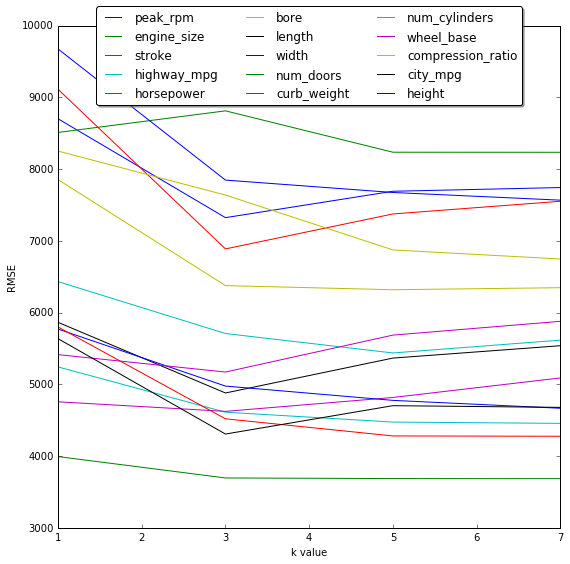

In [187]:
rmse_values_columns = {}
k_values = [1,3,5,7]

for column in numeric_columns_for_train:
    rmse_values = {}

    for k in k_values:
        rmse_values[k] = \
        knn_train_test(column,"price",normalized_cars,k)
        
    rmse_values_columns[column] = rmse_values
    
plt.figure(figsize=(9,9))

for k,v in rmse_values_columns.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y,label=k)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    
plt.show()


## 4. MULTIVARIATE MODEL: SIMPLE HOLDOUT VALIDATION

In [188]:
def knn_train_test_M(train_cols,target_col,dataframe,k):
    np.random.seed(1)
    shuffled_index = np.random.permutation(dataframe.index)
    df = dataframe.reindex(shuffled_index)
    
    split_one = df[:96]
    split_two = df[96:]
    train_one = split_one
    test_one = split_two
    train_two = split_two
    test_two = split_one
    rmse_values = []
    
    knn_1 = KNeighborsRegressor(n_neighbors=k)
    knn_1.fit(train_one[train_cols],train_one[target_col])
    predictions = knn_1.predict(test_one[train_cols])
    rmse_1 = mean_squared_error(test_one[target_col],predictions)**0.5
    rmse_values.append(rmse_1)
    
    knn_2 = KNeighborsRegressor(n_neighbors=k)
    knn_2.fit(train_two[train_cols],train_two[target_col])
    predictions = knn_2.predict(test_two[train_cols])
    rmse_2 = mean_squared_error(test_two[target_col],predictions)**0.5
    rmse_values.append(rmse_2)
    
    return np.mean(rmse_values)

In [189]:
two_best_features = ["engine_size","curb_weight"]
three_best_features = ["engine_size","curb_weight","highway_mpg"]
four_best_features = ["engine_size","curb_weight","highway_mpg","city_mpg"]
five_best_features = ["engine_size","curb_weight","highway_mpg","city_mpg","width"]

In [190]:
print("With two best features and K=5, RMSE = ",\
      knn_train_test_M(two_best_features,\
                       "price",normalized_cars,5))

print("With three best features and K=5, RMSE = ",\
      knn_train_test_M(three_best_features,\
                       "price",normalized_cars,5))

print("With four best features and K=5, RMSE = ",\
      knn_train_test_M(four_best_features,\
                       "price",normalized_cars,5))

print("With five best features and K=5, RMSE = ",\
      knn_train_test_M(five_best_features,\
                       "price",normalized_cars,5))

With two best features and K=5, RMSE =  3657.1974524067614
With three best features and K=5, RMSE =  3572.7659273136737
With four best features and K=5, RMSE =  3742.647428432207
With five best features and K=5, RMSE =  3598.7356621383465


### Varying the hyperparameter k: 1 to 25.

In [191]:
top_1 = {}
top_2 = {}
top_3 = {}

for i in range(1,26):
    top_1[i]=knn_train_test_M(three_best_features,\
                       "price",normalized_cars,i)
for i in range(1,26):
    top_2[i]=knn_train_test_M(five_best_features,\
                       "price",normalized_cars,i)
for i in range(1,26):
    top_3[i]=knn_train_test_M(two_best_features,\
                       "price",normalized_cars,i)

best_features = {"three best features":top_1,\
                "five best features":top_2,\
                "two best features":top_3}

series1 = pd.Series(top_1).sort_values()
series2 = pd.Series(top_2).sort_values()
series3 = pd.Series(top_3).sort_values()

In [192]:
print("for the 3-features model, the optimal k-value is: ", \
     series1.index[0])
print("for the 5-features model, the optimal k-value is: ", \
     series2.index[0])
print("for the 2-features model, the optimal k-value is: ", \
     series3.index[0])

for the 3-features model, the optimal k-value is:  2
for the 5-features model, the optimal k-value is:  1
for the 2-features model, the optimal k-value is:  3


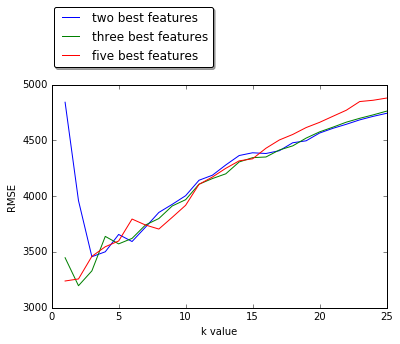

In [193]:

for k,v in best_features.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y,label=k)
    plt.legend(loc='lower right', bbox_to_anchor=(0.5, 1.05),
          ncol=1, fancybox=True, shadow=True)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

#### Notes:


- The optimal k-value for the three models are in the interval = [1,5]


- From a k-value of 5 to 25 the model's error for the 3 top models goes up.

## 5. MULTIVARIATE K-FOLD CROSS VALIDATION 

In [194]:
def knn_train_test_M_KF(train_cols,target_col,dataframe,k,k_f):
    
    kf = KFold(k_f,shuffle=True,random_state=1)
    knn = KNeighborsRegressor(n_neighbors=k)
    mses = cross_val_score(knn,dataframe[train_cols],\
        dataframe["price"],scoring=make_scorer(mean_squared_error),\
                           cv=kf)
    rmses = [(abs(j))**0.5 for j in mses]
    avg_rmse = np.mean(rmses)

    return avg_rmse

In [195]:
top_kf1 = {}
top_kf2 = {}
top_kf3 = {}
    
k_folds = [3,4,5,6,7]

for j in k_folds:
    for i in range(1,26):
        top_kf1[(i,j)]=knn_train_test_M_KF(three_best_features,\
                       "price",normalized_cars,i,j)

for j in k_folds:
    for i in range(1,26):
        top_kf2[(i,j)]=knn_train_test_M_KF(five_best_features,\
                       "price",normalized_cars,i,j)

for j in k_folds:
    for i in range(1,26):
        top_kf3[(i,j)]=knn_train_test_M_KF(two_best_features,\
                       "price",normalized_cars,i,j)

best_features = {"three best features":top_kf1,\
                "five best features":top_kf2,\
                "two best features":top_kf3}

In [196]:
serieskf1 = pd.Series(top_kf1).sort_values()
serieskf2 = pd.Series(top_kf2).sort_values()
serieskf3 = pd.Series(top_kf3).sort_values()

In [197]:
print("for the 3-features model, the optimal (k-value,k-fold) is: ", \
     series1.index[0], "with a avg rmse of: ", serieskf1.min())
print("for the 5-features model, the optimal (k-value,k-fold) is: ", \
     series2.index[0], "with a avg rmse of: ", serieskf2.min())
print("for the 2-features model, the optimal (k-value,k-fold) is: ", \
     series3.index[0], "with a avg rmse of: ", serieskf3.min())

for the 3-features model, the optimal (k-value,k-fold) is:  2 with a avg rmse of:  2821.4584711412326
for the 5-features model, the optimal (k-value,k-fold) is:  1 with a avg rmse of:  2763.271370442705
for the 2-features model, the optimal (k-value,k-fold) is:  3 with a avg rmse of:  3389.087924708964


## 6. Conclusion: 
<i><b> The optimal model (low RMSE or root middle squared error) is the one that uses a k-value of 2, 7 folds and 3 best features to train.

In [ ]:
retentions_afip
retentions_empresa
diferencias = (retentions_afip is retentions_empresa)